# Deflection with Moment area method

based on:

1. Yao_Mobasher2019_Analytical approach for the design of flexural elements made of reinforced ultra-high performance concrete
2. (Modern Concrete Technology) Alva Peled, Arnon Bentur, Barzin Mobasher - Textile Reinforced Concrete-CRC Press (2017)

## Determination of Deflection Response

The important methods used for finding out the slope and deflection at a section in a loaded beam are
1. Double integration method
2. Moment area method
3. Macaulay‟s method

With the moment-area method, the curvature diagram of a half-model according to the internal moment in Figure 1.1(c-d) is divided into several areas. By taking the moment of the areas around the left support, the mid-span deflection is obtained. A set of equations for calculating the mid-span deflection δ of the three-point and four-point bending at the first cracking (δcr), at ultimate (δu) when material has μ>μcrit are presented in Eqs.1 and qs.2. Mcr and Mu are the bending moments corresponding to the first cracking (φcr, δcr) and ultimate state (φu, δu), respectively.

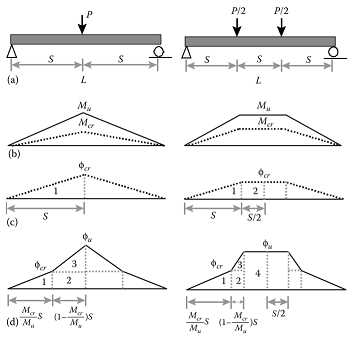

<p style="text-align: center;">figure 1.1
Moment–curvature distribution for 3PB and 4PB strain-hardening</p>


## Import modules

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
from sympy import *


In [ ]:
from scipy.optimize import newton, brentq, root

In [ ]:
%run moment_curvature.ipynb

In [ ]:
model_data

In [ ]:
M,L ,L_p,phi,phi_u,phi_cr,M_u,M_cr,mu,mu_crit,delta_cr = sp.symbols(
    r'M,L,L_p,phi,phi_u,phi_cr,M_u,M_cr,mu,mu_crit,delta_cr', 
    real=True, nonnegative=True
)

In [ ]:
load = sp.Piecewise(
     (M*4/L , True ),
)
load

In [ ]:
model_data = {
    phi_cr : 0.0035,
    L : 100,
    L_p : 25,
    M_cr : 25, 
    mu_crit : 0.1
}
# The values and their sign should be determind!

In [ ]:
get_load = sp.lambdify(
    (M), load.subs(model_data), 'numpy'
)

In [ ]:
load = get_load(M_arr)
load

 Eq.1

In [ ]:
delta_3PB = sp.Piecewise(
    
    (Rational(1,12)*(L**2)*phi, phi <= phi_cr),
        ((L**2/(24*M**2))*((2*M**2-M*M_cr**2-M_cr**2)*phi + (M**2 + M*M_cr)*phi_cr) ,  phi > phi_cr),
)

delta_3PB

In [ ]:
delta_3PB.subs(model_data)

 Eq.2

In [ ]:
delta_4PB = sp.Piecewise(
    
    (Rational(23,216)*(L**2)*phi, phi <= phi_cr),
        ((L**2/(216*M**2))*((23*M**2-4*M*M_cr**2-4*M_cr**2)*phi + (4*M**2 + 4*M*M_cr)*phi_cr) ,  phi > phi_cr),
)

delta_4PB

In [ ]:
delta_4PB.subs(model_data)

In [ ]:
get_delta_3PB = sp.lambdify(
    (M, phi), delta_3PB.subs(model_data), 'numpy'
)

In [ ]:
get_delta_4PB = sp.lambdify(
    (M, phi), delta_4PB.subs(model_data), 'numpy'
)

In [ ]:
delta3PB = get_delta_3PB (M_arr, kappa_arr)
delta3PB

In [ ]:
delta4PB = get_delta_4PB (M_arr, kappa_arr)
delta4PB

In [ ]:
fig, ((ax1, ax2 , ax3)) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(kappa_arr, M_arr, 'tab:orange'),  ax1.set(title= 'Moment Curvature', xlabel=r'$\phi$', ylabel='$M$')
ax2.plot(delta3PB, load ,'tab:blue'),ax2.set(title= 'Load Deflection 3PB', xlabel=r'$\delta$', ylabel='$P$')
ax3.plot(delta4PB, load ,'tab:red'),ax3.set(title= 'Load Deflection 4PB', xlabel=r'$\delta$', ylabel='$P$')

fig. tight_layout() 
fig.autofmt_xdate()


fig, ((ax1, ax2 , ax3)) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(kappa_arr, M_arr, 'tab:orange'),  ax1.set(title= 'Moment Curvature', xlabel=r'$\phi$', ylabel='$M$')
ax2.plot(delta3PB, load ,'tab:blue'),ax2.set(title= 'Load Deflection 3PB', xlabel=r'$\delta$', ylabel='$P$')
ax3.plot(delta4PB, load ,'tab:red'),ax3.set(title= 'Load Deflection 4PB', xlabel=r'$\delta$', ylabel='$P$')

fig. tight_layout() 
fig.autofmt_xdate()


In [ ]:
delta_3PB = sp.Piecewise(
    
    (Rational(1,12)*(L**2)*phi, phi <= phi_cr),
        ((L**2/(24*M**2))*((2*M**2-M*M_cr**2-M_cr**2)*phi + (M**2 + M*M_cr)*phi_cr) ,  phi > phi_cr),
)

delta_3PB

In [ ]:
delta_3PB.subs(model_data)

 Eq.2

In [ ]:
delta_4PB = sp.Piecewise(
    
    (Rational(23,216)*(L**2)*phi, phi <= phi_cr),
        ((L**2/(216*M**2))*((23*M**2-4*M*M_cr**2-4*M_cr**2)*phi + (4*M**2 + 4*M*M_cr)*phi_cr) ,  phi > phi_cr),
)

delta_4PB

In [ ]:
delta_4PB.subs(model_data)

In [ ]:
get_delta_3PB = sp.lambdify(
    (M, phi), delta_3PB.subs(model_data), 'numpy'
)

In [ ]:
get_delta_4PB = sp.lambdify(
    (M, phi), delta_4PB.subs(model_data), 'numpy'
)

In [ ]:
delta3PB = get_delta_3PB (M_arr, kappa_arr)
delta3PB

In [ ]:
delta4PB = get_delta_4PB (M_arr, kappa_arr)
delta4PB

In [ ]:
fig, ((ax1, ax2 , ax3)) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(kappa_arr, M_arr, 'tab:orange'),  ax1.set(title= 'Moment Curvature', xlabel=r'$\phi$', ylabel='$M$')
ax2.plot(delta3PB, load ,'tab:blue'),ax2.set(title= 'Load Deflection 3PB', xlabel=r'$\delta$', ylabel='$P$')
ax3.plot(delta4PB, load ,'tab:red'),ax3.set(title= 'Load Deflection 4PB', xlabel=r'$\delta$', ylabel='$P$')

fig. tight_layout() 
fig.autofmt_xdate()
